### Optimization of k, A and eps

In [14]:
import matplotlib.pyplot as plt
from example_read_rms import read_h5
import numpy as np
import os

 # slfredri code
path = r'\\markov.math.ntnu.no\work\slfredri\20210831\Chs03400_04600'
filepaths = os.listdir(r'\\markov.math.ntnu.no\work\slfredri\20210831\Chs03400_04600')
filepaths = [path+'/'+p for p in filepaths]

#settings
idx_file_load=90 # index file to load from file list

#plot settings
vmin_rms, vmax_rms = -10.5, None
plot_log=1; log_thres=1e-12


    # load data and info from file
list_data, info = read_h5(filepaths[idx_file_load], labels_group=("rms","gaps"), labels_data=("rms",), verbose=False)
rms = list_data[0]



In [15]:
from utils import generate_timestamps

idx0 = 88
idx1 = 89
idx2 = 90
idx3 = 91

list_data0, info0 = read_h5(filepaths[idx0], labels_group=("rms","gaps"), labels_data=("rms",), verbose=False)
rms0 = list_data0[0]
rms_plot0 = np.log10(rms0+log_thres); label_cbar='log(RMS Strain)'
dt_rms0 = info0["rms"]["dt_rms"]  # temporal sampling interval of rms data
time_utc0 = info0["gen"]["time_utc"]  # time of first sample 
times0 = generate_timestamps(time_utc0, dt_rms0, rms0.shape[0])

list_data1, info1 = read_h5(filepaths[idx1], labels_group=("rms","gaps"), labels_data=("rms",), verbose=False)
rms1 = list_data1[0]
rms_plot1 = np.log10(rms1+log_thres); label_cbar='log(RMS Strain)'
dt_rms1 = info1["rms"]["dt_rms"]  # temporal sampling interval of rms data
time_utc1 = info1["gen"]["time_utc"]  # time of first sample 
times1 = generate_timestamps(time_utc1, dt_rms1, rms1.shape[0])

list_data2, info2 = read_h5(filepaths[idx2], labels_group=("rms","gaps"), labels_data=("rms",), verbose=False)
rms2 = list_data2[0]
rms_plot2 = np.log10(rms2+log_thres); label_cbar='log(RMS Strain)'
dt_rms2 = info2["rms"]["dt_rms"]  # temporal sampling interval of rms data
time_utc2 = info2["gen"]["time_utc"]  # time of first sample 
times2 = generate_timestamps(time_utc2, dt_rms2, rms2.shape[0])

list_data3, info3 = read_h5(filepaths[idx3], labels_group=("rms","gaps"), labels_data=("rms",), verbose=False)
rms3 = list_data3[0]
rms_plot3 = np.log10(rms3+log_thres); label_cbar='log(RMS Strain)'
dt_rms3 = info3["rms"]["dt_rms"]  # temporal sampling interval of rms data
time_utc3 = info3["gen"]["time_utc"]  # time of first sample 
times3 = generate_timestamps(time_utc3, dt_rms3, rms3.shape[0])


In [16]:
# Indices
indices = [1,2,3]

# Lists to store data
list_datas = []
infos = []
rms_list = []
rms_plot_list = []
dt_rms_list = []
time_utc_list = []
times_list = []

# Process each index
for idx in indices:
    # Append data to respective lists
    list_datas.append(locals()[f'list_data{idx}'])
    infos.append(locals()[f'info{idx}'])
    rms_list.append(locals()[f'rms{idx}'])
    rms_plot_list.append(locals()[f'rms_plot{idx}'])
    dt_rms_list.append(locals()[f'dt_rms{idx}'])
    time_utc_list.append(locals()[f'time_utc{idx}'])
    times_list.append(locals()[f'times{idx}'])

    # Set label_cbar for each configuration
    label_cbar = 'log(RMS Strain)'

In [17]:

import numpy as np
import matplotlib.pyplot as plt
from data_processing import process_strain_data, process_strain_data_2d
from utils import map_point_between_ranges
import plotly.graph_objs as go

## window size k ##
window_sizes =  np.arange(1,40)
min_amplitude = -8.8
eps_value = 0.05

picks_ch1000_list = []

for i in range(len(window_sizes)):
    window_size = window_sizes[i]
    
    picks_ch1000 = []

    # Process each rms_plot for the current parameter configuration
    for j in range(len(rms_plot_list)):
        rms_plot = rms_plot_list[j]
        
        rms_processed = process_strain_data(
            np.expand_dims(rms_plot[:,int(map_point_between_ranges(1000, reverse = True))], axis=1),
            min_amplitude=min_amplitude, 
            eps=eps_value, 
            window_size=window_size
        )
        
        timestamps_indices_ch1000 = np.nonzero(rms_processed)

        start_time_utc = str(time_utc_list[j])
        step_size_seconds = dt_rms_list[j]
        num_timestamps = rms_list[j].shape[0]
        times = generate_timestamps(start_time_utc, step_size_seconds, num_timestamps)
        
        picks_ch1000.append([times[k].timestamp() for k in timestamps_indices_ch1000[0]])
        
    picks_ch1000_list.append(picks_ch1000)
  
    


In [18]:
from utils import hausdorff_distance
import pandas as pd
from datetime import datetime, timedelta

times_log = ["14:23:10", "14:23:27", "14:24:03", "14:24:17",
    "14:24:44", "14:25:07", "14:25:58", "14:26:07", "14:27:43",
    "14:27:58", "14:28:06", "14:29:00", "14:29:43", "14:30:35",
    "14:30:48", "14:31:12", "14:31:35", "14:31:45", "14:31:54",
    "14:32:34", "14:33:06", "14:33:21", "14:33:27", "14:33:46",
    "14:34:10", "14:34:51", "14:35:06", "14:35:16"
]

datetimes_log = [datetime.strptime(f"2021-08-31 {timestamp}", "%Y-%m-%d %H:%M:%S") for timestamp in times_log]
timestamps_log = [dt.timestamp() for dt in datetimes_log]

haus_distances = []
lower = min(datetimes_log).timestamp()
upper = max(datetimes_log).timestamp()
for i in range(len(picks_ch1000_list)): 
    timestamps_picks_ch1000 = [pick for sublist in picks_ch1000_list[i] for pick in sublist if pick >= lower and pick <= upper]
    haus_distances.append(hausdorff_distance(timestamps_picks_ch1000, timestamps_log, alpha = 0))

haus_frame = pd.DataFrame({'Hausdorff distance': haus_distances, 'k': window_sizes})

best_row = haus_frame[haus_frame['Hausdorff distance'] == haus_frame['Hausdorff distance'].min()]
best_k = best_row['k'].values[0]
best_haus = best_row['Hausdorff distance'].values[0]

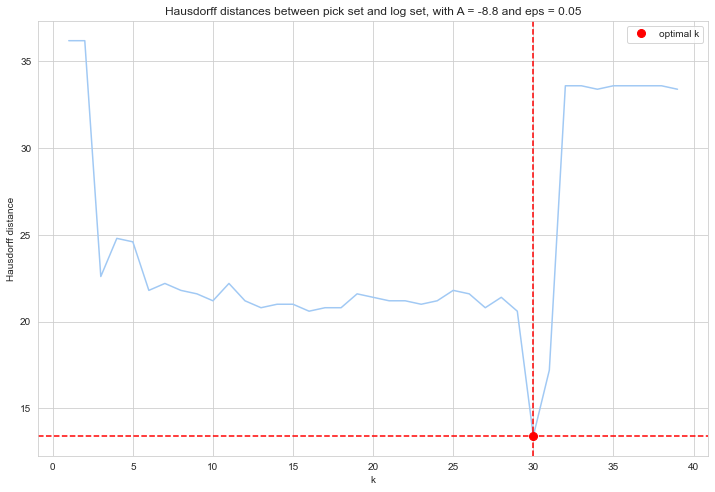

In [19]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a bar plot
plt.figure(figsize=(12, 8))

# Customize the appearance of the bar plot
ax = sns.lineplot(data=haus_frame, x='k', y='Hausdorff distance', ci=None)
plt.title(f'Hausdorff distances between pick set and log set, with A = {min_amplitude} and eps = {eps_value}')
plt.xlabel('k')
plt.ylabel('Hausdorff distance')
plt.plot(best_k, best_haus, 'ro', markersize=8, label = 'optimal k')
plt.axhline(y = best_haus, color = 'red', linestyle = '--')
plt.axvline(x = best_k, color = 'red', linestyle = '--')
plt.legend()
plt.show()

In [20]:
## minimum amplitude A ##
window_size =  best_k
min_amplitudes = np.arange(-9.5,-8.05, 0.05)
eps_value = 0.05

picks_ch1000_list = []

for i in range(len(min_amplitudes)):
    min_amplitude = min_amplitudes[i]
    
    picks_ch1000 = []

    # Process each rms_plot for the current parameter configuration
    for j in range(len(rms_plot_list)):
        rms_plot = rms_plot_list[j]
        
        rms_processed = process_strain_data(
            np.expand_dims(rms_plot[:,int(map_point_between_ranges(1000, reverse = True))], axis=1),
            min_amplitude=min_amplitude, 
            eps=eps_value, 
            window_size=window_size
        )
        
        timestamps_indices_ch1000 = np.nonzero(rms_processed)

        start_time_utc = str(time_utc_list[j])
        step_size_seconds = dt_rms_list[j]
        num_timestamps = rms_list[j].shape[0]
        times = generate_timestamps(start_time_utc, step_size_seconds, num_timestamps)
        
        picks_ch1000.append([times[k].timestamp() for k in timestamps_indices_ch1000[0]])
        
    picks_ch1000_list.append(picks_ch1000)
  

In [21]:
from utils import hausdorff_distance
import pandas as pd
haus_distances = []
lower = min(datetimes_log).timestamp()
upper = max(datetimes_log).timestamp()
for i in range(len(picks_ch1000_list)): 
    timestamps_picks_ch1000 = [pick for sublist in picks_ch1000_list[i] for pick in sublist if pick >= lower and pick <= upper]
    haus_distances.append(hausdorff_distance(timestamps_picks_ch1000, timestamps_log, alpha = 0))

haus_frame = pd.DataFrame({'Hausdorff distance': haus_distances, 'A': min_amplitudes})

best_row = haus_frame[haus_frame['Hausdorff distance'] == haus_frame['Hausdorff distance'].min()]
best_A = best_row['A'].values[0]
best_haus = best_row['Hausdorff distance'].values[0]

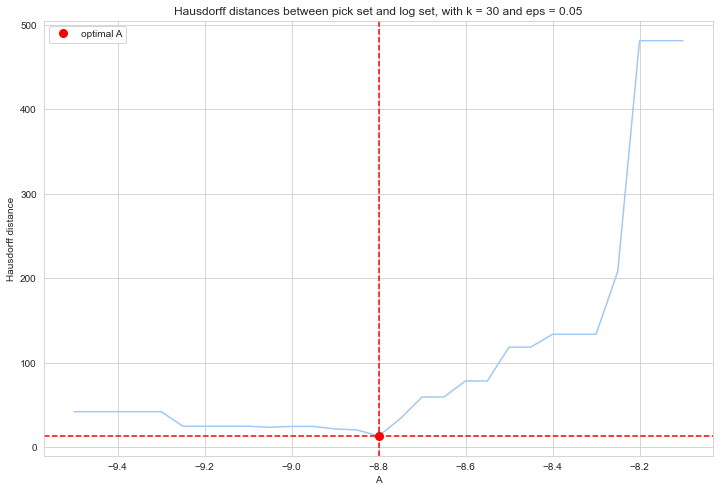

In [22]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a bar plot
plt.figure(figsize=(12, 8))

# Customize the appearance of the bar plot
ax = sns.lineplot(data=haus_frame, x='A', y='Hausdorff distance', ci=None)
plt.title(f'Hausdorff distances between pick set and log set, with k = {best_k} and eps = {eps_value}')
plt.xlabel('A')
plt.ylabel('Hausdorff distance')
plt.plot(best_A, best_haus, 'ro', markersize=8, label = 'optimal A')
plt.axhline(y = best_haus, color = 'red', linestyle = '--')
plt.axvline(x = best_A, color = 'red', linestyle = '--')
plt.legend()

plt.show()

In [23]:
## epsilon ##
window_size =  best_k
min_amplitude = best_A
eps_values = np.arange(0.00001,0.2, 0.001)

picks_ch1000_list = []

for i in range(len(eps_values)):
    eps_value = eps_values[i]
    
    picks_ch1000 = []

    # Process each rms_plot for the current parameter configuration
    for j in range(len(rms_plot_list)):
        rms_plot = rms_plot_list[j]
        
        rms_processed = process_strain_data(
            np.expand_dims(rms_plot[:,int(map_point_between_ranges(1000, reverse = True))], axis=1),
            min_amplitude=min_amplitude, 
            eps=eps_value, 
            window_size=window_size
        )
        
        timestamps_indices_ch1000 = np.nonzero(rms_processed)

        start_time_utc = str(time_utc_list[j])
        step_size_seconds = dt_rms_list[j]
        num_timestamps = rms_list[j].shape[0]
        times = generate_timestamps(start_time_utc, step_size_seconds, num_timestamps)
        
        picks_ch1000.append([times[k].timestamp() for k in timestamps_indices_ch1000[0]])
        
    picks_ch1000_list.append(picks_ch1000)

In [24]:
from utils import hausdorff_distance
import pandas as pd
haus_distances = []
lower = min(datetimes_log).timestamp()
upper = max(datetimes_log).timestamp()
for i in range(len(picks_ch1000_list)): 
    timestamps_picks_ch1000 = [pick for sublist in picks_ch1000_list[i] for pick in sublist if pick >= lower and pick <= upper]
    haus_distances.append(hausdorff_distance(timestamps_picks_ch1000, timestamps_log, alpha = 10))

haus_frame = pd.DataFrame({'Hausdorff distance': haus_distances, 'eps': eps_values})

best_row = haus_frame[haus_frame['Hausdorff distance'] == haus_frame['Hausdorff distance'].min()]
best_eps = best_row['eps'].values[0]
best_haus = best_row['Hausdorff distance'].values[0]

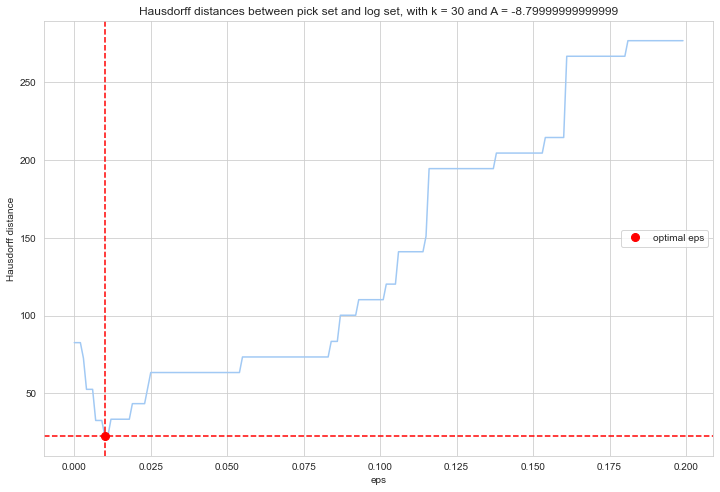

In [25]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a bar plot
plt.figure(figsize=(12, 8))

# Customize the appearance of the bar plot
ax = sns.lineplot(data=haus_frame, x='eps', y='Hausdorff distance', ci=None)
plt.title(f'Hausdorff distances between pick set and log set, with k = {best_k} and A = {best_A}')
plt.xlabel('eps')
plt.ylabel('Hausdorff distance')
plt.plot(best_eps, best_haus, 'ro', markersize=8, label = 'optimal eps')
plt.axhline(y = best_haus, color = 'red', linestyle = '--')
plt.axvline(x = best_eps, color = 'red', linestyle = '--')
plt.legend()

plt.show()